In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

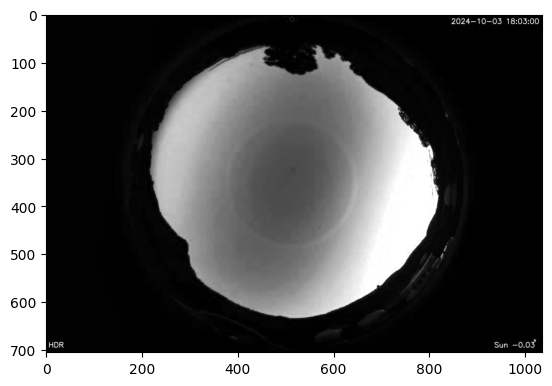

In [10]:
path = r"C:\Users\ASUS\Documents\NARIT_internship_data\Test_folder\638635393872115938.png"
img = cv2.imread(path)
B,G,R = cv2.split(img)
clahe = cv2.createCLAHE(clipLimit=0.001, tileGridSize=(7,7))
clahe_image = clahe.apply(B)
plt.imshow(clahe_image,cmap='gray')

In [11]:
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_,thresh = cv2.threshold(clahe_image,55,255,cv2.THRESH_BINARY)
kernel = np.array([
    [1, -1, 1],
    [1, -1, 1],
    [1, -1, 1]
])
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(thresh, kernel, iterations=3)
erosion = cv2.erode(opening, kernel, iterations=6)

Masked_out = cv2.bitwise_and(img,img,mask=erosion)

upstack = np.hstack((thresh,opening))
downstack = np.hstack((dilated,erosion))
whole_stack = np.vstack((upstack,downstack))


cv2.imshow("Stacked image",whole_stack)
cv2.imshow("Masked image",Masked_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2 as cv

# Global variables
mask = None
drawing = False  # True if the mouse is pressed
ix, iy = -1, -1  # Initial positions
contour = []  # List to store points of the contour

# Mouse callback function
def draw_contour(event, x, y, flags, param):
    global ix, iy, drawing, contour
    global mask
    if event == cv.EVENT_LBUTTONDOWN:  # When left mouse button is clicked
        drawing = True
        ix, iy = x, y  # Initial position
        contour = [(x, y)]  # Start the contour with the first point

    elif event == cv.EVENT_MOUSEMOVE:  # When mouse is moving
        if drawing:  # If drawing is enabled
            contour.append((x, y))  # Add current mouse position to the contour
            img_copy = img.copy()  # Create a copy of the image to display the drawing
            if len(contour) > 1:  # If there are enough points, draw the contour
                cv.polylines(img_copy, [np.array(contour)], False, (0, 255, 0), 2)
            cv.imshow('image', img_copy)  # Show the updated image with the contour

    elif event == cv.EVENT_LBUTTONUP:  # When left mouse button is released
        drawing = False
        contour.append((x, y))  # Add the final point
        if len(contour) > 1:  # Finalize the contour
            mask = np.zeros_like(img[:, :, 0])  # Create a mask of the same size as the image, single channel
            cv.fillPoly(mask, [np.array(contour)], 255)  # Fill the contour in the mask with white (255)
            masked_img = cv.bitwise_and(img, img, mask=mask)  # Apply mask to the image
            cv.imshow('Masked Image', masked_img)  # Show the masked image
        cv.imshow('image', img)  # Show the finalized image

# Load the image
img = cv.imread(r"C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_China\2024-08\2024-08-02\638581597265612589.png")

# Create a window and set up the mouse callback
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.setMouseCallback('image', draw_contour)

# Resize only the window, not the image
cv.resizeWindow('image', 1036, 705)  # Set the window size to 300x200 pixels (or any smaller size)
while True:
    cv.imshow('image', img)  # Display the image at its original resolution
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # Press 'ESC' to exit
        if mask is not None:
            cv.imwrite("mask.png", mask)  # Save the mask if it exists
        break

cv.destroyAllWindows()
